In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("tweet_emotions.csv",index_col='tweet_id')

In [3]:
data.head()

,sentiment,content
tweet_id,,
1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
1956967696,sadness,Funeral ceremony...gloomy friday...
1956967789,enthusiasm,wants to hang out with friends SOON!
1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 1956967341 to 1753919049
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 937.5+ KB


In [5]:
data.duplicated().sum()

91

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39909 entries, 1956967341 to 1753919049
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  39909 non-null  object
 1   content    39909 non-null  object
dtypes: object(2)
memory usage: 935.4+ KB


In [8]:
data['sentiment'].value_counts()

sentiment
neutral       8617
worry         8452
happiness     5194
sadness       5160
love          3801
surprise      2187
fun           1776
relief        1524
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data['content'] = data['content'].astype(str)

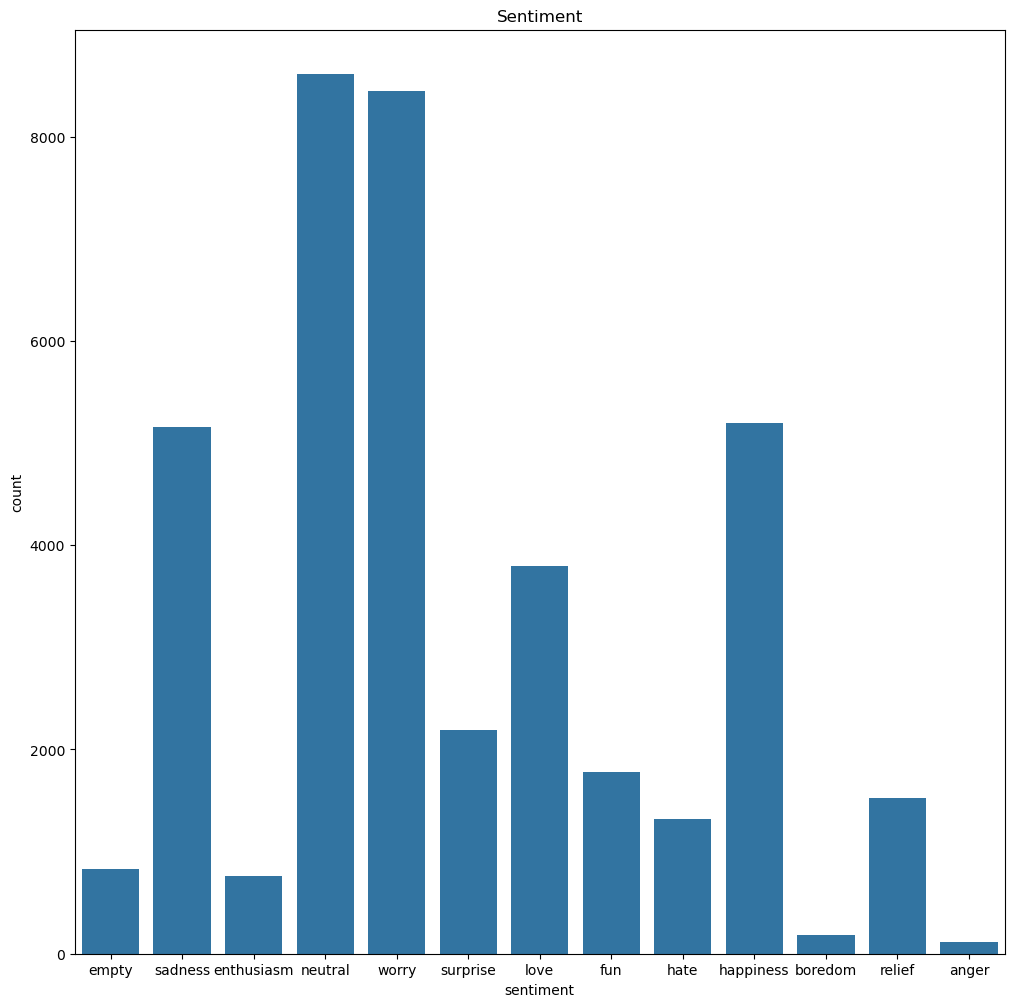

In [11]:
plt.figure(figsize=(12, 12))
sns.countplot(x=data['sentiment'])
plt.title('Sentiment')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data['content']
y = data['sentiment']

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def cleansing(df):
   
    df_clean = df.str.lower()

    df_clean = [re.sub(r'http\S+', '', i) for i in df_clean]

    df_clean = [re.sub(r'@[\w_]+', '', i) for i in df_clean]

    df_clean = [re.sub(r'#', '', i) for i in df_clean]

    df_clean = [re.sub(r'\d+', '', i) for i in df_clean]

    df_clean = [re.sub(r'[^\w\s]', ' ', i) for i in df_clean]

    df_clean = [re.sub(r'\s+', ' ', i).strip() for i in df_clean]

    return df_clean

In [17]:
train_clean = cleansing(X_train)
test_clean = cleansing(X_test)
val_clean = cleansing(X_val)

In [18]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def process_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

In [19]:
train_processed = [process_text(text) for text in train_clean]
test_processed = [process_text(text) for text in test_clean]
val_processed = [process_text(text) for text in val_clean]

In [20]:
val_processed[0:5]

[['watch',
  'termin',
  'cri',
  'one',
  'movi',
  'make',
  'cri',
  'reason',
  'arni',
  'die',
  'im',
  'lame'],
 ['wrote',
  'tomorrow',
  'dworld',
  'show',
  'follow',
  'get',
  'feed',
  'soon',
  'mine',
  'see',
  'first'],
 ['cool', 'good', 'back', 'train'],
 ['rose', 'romanc', 'releas', 'thursday', 'gon', 'na', 'get', 'bp'],
 ['happen',
  'often',
  'hate',
  'everi',
  'time',
  'move',
  'usernam',
  'thought',
  'love',
  'move',
  'soon']]

In [21]:
test_processed[0:5]

[['love', 'new', 'websit'],
 ['gim',
  'wan',
  'na',
  'tri',
  'soulja',
  'boy',
  'tell',
  'em',
  'live',
  'live',
  'gt'],
 ['look',
  'like',
  'gm',
  'bankruptci',
  'go',
  'happen',
  'loss',
  'help',
  'offset',
  'gain',
  'earlier',
  'year',
  'tax',
  'wise',
  'oh',
  'well'],
 ['anyon', 'want', 'chocol', 'nutella', 'mochi', 'gon', 'na', 'go', 'wast'],
 ['want',
  'tuna',
  'amp',
  'salmon',
  'sashimi',
  'b',
  'c',
  'roll',
  'dragon',
  'eye']]

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

#### Tf-IDF 

In [23]:
def training_tfidf(model, data, target):
    mod = Pipeline([('vect',TfidfVectorizer()),
                   ('clf',model)])
    mod.fit(data,target)
    return mod

### Decision Tree Model

In [24]:
DTree = training_tfidf(DecisionTreeClassifier(random_state = 42), X_train, y_train)
y_pred=DTree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         4
     boredom       0.00      0.00      0.00         4
       empty       0.08      0.09      0.08        33
  enthusiasm       0.00      0.00      0.00        30
         fun       0.06      0.04      0.05        68
   happiness       0.27      0.27      0.27       202
        hate       0.02      0.03      0.03        33
        love       0.30      0.31      0.30       150
     neutral       0.34      0.37      0.35       368
      relief       0.10      0.05      0.07        76
     sadness       0.23      0.25      0.24       197
    surprise       0.09      0.08      0.09        85
       worry       0.29      0.31      0.30       347

    accuracy                           0.26      1597
   macro avg       0.14      0.14      0.14      1597
weighted avg       0.25      0.26      0.25      1597



### Random Forest Model

In [25]:
RandFor = training_tfidf(RandomForestClassifier(random_state = 42), X_train, y_train)
y_pred=RandFor.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         4
     boredom       0.00      0.00      0.00         4
       empty       0.00      0.00      0.00        33
  enthusiasm       0.00      0.00      0.00        30
         fun       0.00      0.00      0.00        68
   happiness       0.32      0.24      0.28       202
        hate       0.38      0.09      0.15        33
        love       0.50      0.41      0.45       150
     neutral       0.33      0.58      0.42       368
      relief       0.25      0.01      0.03        76
     sadness       0.36      0.19      0.25       197
    surprise       0.40      0.02      0.04        85
       worry       0.31      0.48      0.37       347

    accuracy                           0.33      1597
   macro avg       0.22      0.16      0.15      1597
weighted avg       0.31      0.33      0.29      1597



### Logistic Regression Model

In [26]:
LogReg = training_tfidf(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000), X_train, y_train)
y_pred=LogReg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         4
     boredom       0.00      0.00      0.00         4
       empty       0.00      0.00      0.00        33
  enthusiasm       0.00      0.00      0.00        30
         fun       0.33      0.06      0.10        68
   happiness       0.33      0.34      0.34       202
        hate       0.36      0.12      0.18        33
        love       0.52      0.46      0.49       150
     neutral       0.38      0.52      0.44       368
      relief       0.20      0.03      0.05        76
     sadness       0.34      0.26      0.29       197
    surprise       0.19      0.04      0.06        85
       worry       0.32      0.52      0.40       347

    accuracy                           0.36      1597
   macro avg       0.23      0.18      0.18      1597
weighted avg       0.33      0.36      0.33      1597



### Multinomial Naive Bayes

In [27]:
NaiveBay = training_tfidf(MultinomialNB(), X_train, y_train)
y_pred=NaiveBay.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         4
     boredom       0.00      0.00      0.00         4
       empty       0.00      0.00      0.00        33
  enthusiasm       0.00      0.00      0.00        30
         fun       0.00      0.00      0.00        68
   happiness       0.30      0.06      0.11       202
        hate       0.00      0.00      0.00        33
        love       0.57      0.08      0.14       150
     neutral       0.31      0.38      0.34       368
      relief       0.00      0.00      0.00        76
     sadness       0.40      0.01      0.02       197
    surprise       0.00      0.00      0.00        85
       worry       0.26      0.81      0.40       347

    accuracy                           0.28      1597
   macro avg       0.14      0.10      0.08      1597
weighted avg       0.27      0.28      0.19      1597



### Linear SVM

In [28]:
sgd = training_tfidf(SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None), X_train, y_train)
y_pred=sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         4
     boredom       0.00      0.00      0.00         4
       empty       0.00      0.00      0.00        33
  enthusiasm       0.00      0.00      0.00        30
         fun       0.21      0.10      0.14        68
   happiness       0.26      0.29      0.28       202
        hate       0.18      0.18      0.18        33
        love       0.40      0.55      0.46       150
     neutral       0.42      0.44      0.43       368
      relief       0.10      0.04      0.06        76
     sadness       0.31      0.30      0.30       197
    surprise       0.15      0.07      0.10        85
       worry       0.35      0.41      0.38       347

    accuracy                           0.33      1597
   macro avg       0.18      0.18      0.18      1597
weighted avg       0.31      0.33      0.31      1597

